In [1]:
import scanpy as sc
import pandas as pd

In [37]:
adata = sc.read("/Users/dominik.klein/data/pancreas_multiome_2022_processed.h5ad")

In [38]:
adata = adata[:, adata.var["modality"]=="GEX"].copy()

In [39]:
new_annotations = pd.read_csv("/Users/dominik.klein/paper_writing/moscot/endocrine_refinement.csv")
new_annotations.set_index(keys='Unnamed: 0' ,inplace=True)

In [40]:
adata.obs = adata.obs.merge(new_annotations, left_index=True, right_index=True)

In [41]:
sc.pp.normalize_total(adata, target_sum=1e4)
sc.pp.log1p(adata)

In [42]:
adata = adata[adata.obs["celltype"].isin(["Fev+ Delta", "Eps. progenitors", "Epsilon", "Delta"])].copy()

In [43]:
eps_TFs = ["Rfx2", "Gata6", "Nkx2-2", "Prox1"]

In [44]:
delta_TFs = ["Hhex", "Isl1", "Tsc22d1", "Fos", "Egr1", "Junb"]

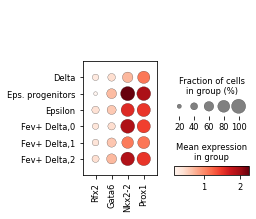

In [45]:
sc.pl.dotplot(adata, eps_TFs, groupby='Fev_delta_refinement')

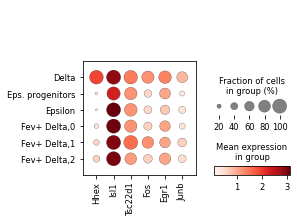

In [46]:
sc.pl.dotplot(adata, delta_TFs, groupby='Fev_delta_refinement')

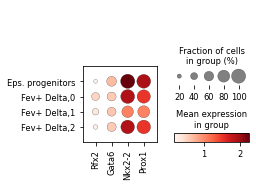

In [29]:
adata_red = adata[~adata.obs['Fev_delta_refinement_gex'].isin(["Fev+ Delta,3", "Fev+ Delta,4"])].copy() # they only contain 1 cell
sc.pl.dotplot(adata_red, eps_TFs, groupby='Fev_delta_refinement_gex')

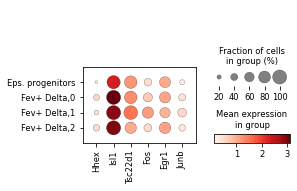

In [30]:
sc.pl.dotplot(adata_red, delta_TFs, groupby='Fev_delta_refinement_gex')

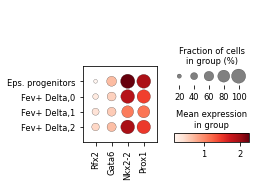

In [31]:
adata_red = adata[~adata.obs['Fev_delta_refinement_atac'].isin(["Fev+ Delta,3"])].copy() # they only contain 1 cell
sc.pl.dotplot(adata_red, eps_TFs, groupby='Fev_delta_refinement_atac')

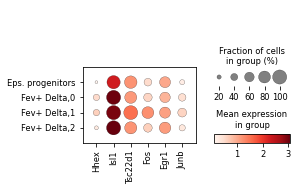

In [32]:
sc.pl.dotplot(adata_red, delta_TFs, groupby='Fev_delta_refinement_atac')